In [1]:
# import packages
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

# import spisea packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# import nbody6tools reader to read data
from nbody6tools import Reader

# import nbody62spisea to retrieve star ages
from nbody62spisea import converter

/home/wyz5rge/.local/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /scratch/wyz5rge/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


## Set up parameters, create isochrone grid

In [2]:
# define isochrone parameters
AKs = 0
dist = 410
evo_model = evolution.MISTv1()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
filt_list = ['jwst,F115W', 'jwst,F182M']
filters = ['m_jwst_F115W', 'm_jwst_F182M']
iso_dir = 'isochrones/'
metallicity = 0

In [3]:
# read nbody data
path_to_data = '../../../../../../storage/jfarias/Data/Orion/massive_clusters/M3000new/sigma0p1/fiducial/sfe_ff010/00/'
snapshot = Reader.read_snapshot(path_to_data, time = 20)

# convert snapshot values from nbody units to astrophysical, extract masses
snapshot.to_physical()

# read ages for simulated stars
cluster_table = converter.to_spicea_table(snapshot)

print(cluster_table)

        mass         isMultiple        compMass             systemMass              e                log_a               age        
-------------------- ---------- ---------------------- ------------------- ------------------- ------------------ ------------------
 0.04627343713928644        0.0                     [] 0.04627343713928644                 nan                nan 19.556162780060912
  25.885203270512562        0.0                     []  25.885203270512562                 nan                nan 18.831665142148427
  17.460593859261614        0.0                     []  17.460593859261614                 nan                nan 18.831665142148427
   34.26262484053662        0.0                     []   34.26262484053662                 nan                nan  19.42973747794478
                 ...        ...                    ...                 ...                 ...                ...                ...
 0.45910799206976305        1.0  [0.19251039711736875]  0.65161838918

In [4]:
masses = cluster_table['mass']
level_ages = cluster_table['age']

for i in range(len(level_ages)):
    level_ages[i] = level_ages[i] * 1e6

# convert log ages from log(Myr) to log(yr)
log_ages = np.log10(level_ages)

# print(log_ages)
print("Min log age = " + str(min(log_ages)))
print("Max log age = " + str(max(log_ages)))

# print(level_ages)
print("Min level age = " + str(min(level_ages)))
print("Max level age = " + str(max(level_ages)))

Min log age = 7.252450574001908
Max log age = 7.301130918504355
Min level age = 17883419.906760104
Max level age = 20004648.208618164


In [5]:
# find index of first binary, create array of companion masses
first_binary = 0
for i in range(len(cluster_table)):
    if cluster_table['isMultiple'][i] == 1.0:
        first_binary = i
        break
print(first_binary)

compMasses = []
for i in range(len(cluster_table)):
    if cluster_table['isMultiple'][i] == 1.0:
        compMasses.append(cluster_table['compMass'][i][0])
print(compMasses)

1419
[0.1611974570734628, 0.0943345068823584, 0.016559550049036417, 0.036762464921706754, 0.06079504069721294, 0.06380029069147307, 0.03585751218111929, 0.23198170119910871, 0.014505237861303671, 0.01700157295774881, 0.03590726762690505, 0.15185415777132716, 0.016974192553383758, 0.033813877077657, 0.23609788874843576, 0.018582387823443246, 0.06421919131651019, 0.1164746761542246, 0.011075767714046215, 0.047540997935940646, 0.3236640894298204, 0.027676542925900337, 0.10202100186190528, 0.04116174703271113, 0.05504586772256095, 0.2166623824028378, 0.24503374099731445, 0.13055501878261566, 0.13042193812875036, 0.5353281358016859, 0.025192955983252337, 0.581268310546875, 0.16077175431220242, 0.07552792876958847, 0.0935800150166617, 0.5946085320749533, 0.08196223014657142, 0.07318422046273358, 0.03374142227415134, 0.013199711256715365, 0.38568341907419146, 0.13841266342427164, 0.162639881181899, 0.022449140247526474, 0.20868462114091782, 0.28994787807877465, 0.3365007399549862, 4.829887554

In [6]:
start = (min(level_ages) // 0.5e6) * 0.5e6
end = (max(level_ages) // 0.5e6) * 0.5e6 + 2 * 0.5e6
increment = 0.5e6  # 500,000

# Create age arrays
level_age_arr = np.arange(start, end, increment)
log_age_arr = np.log10(level_age_arr)

print(log_age_arr)
print(level_age_arr)

[7.24303805 7.25527251 7.26717173 7.2787536  7.29003461 7.30103
 7.31175386]
[17500000. 18000000. 18500000. 19000000. 19500000. 20000000. 20500000.]


In [7]:
# create isochrone grid - if this is the first time, then this is going to take an hour lmfao
instances = np.empty(len(log_age_arr), dtype=object)

for i in range(len(log_age_arr)):
    my_iso = synthetic.IsochronePhot(log_age_arr[i], AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

Changing to logg=2.50 for T= 12845 logg=2.50
Changing to logg=2.50 for T= 12665 logg=2.47
Changing to logg=2.50 for T= 12488 logg=2.45
Changing to logg=2.50 for T= 12313 logg=2.43
Changing to logg=2.50 for T= 12140 logg=2.40
Changing to logg=2.50 for T= 11970 logg=2.38
Changing to logg=2.50 for T= 11802 logg=2.36
Changing to logg=2.00 for T=  9412 logg=2.00
Changing to logg=2.00 for T=  9280 logg=1.97
Changing to logg=2.00 for T=  9149 logg=1.95
Changing to logg=2.00 for T=  9021 logg=1.93
Isochrone generation took 39.375965 s.
Making photometry for isochrone: log(t) = 7.24  AKs = 0.00  dist = 410
     Starting at:  2023-12-19 04:08:15.122129   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.100 Msun  T =  3005 K  m_jwst_F115W = 16.19
M =   1.704 Msun  T =  8042 K  m_jwst_F115W = 10.16
M =   5.730 Msun  T = 18098 K  m_jwst_F115W = 7.46
M =  11.902 Msun  T = 21088 K  m_jwst_F115W = 4.49
M =  11.990 Msun  T = 10540 K

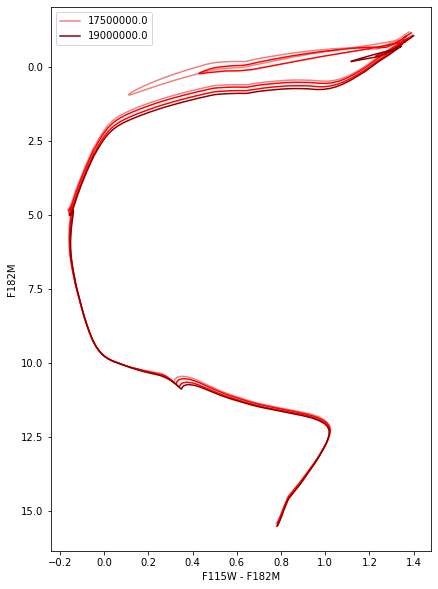

In [8]:
# identify array indeces, create array for labels and colors
idx_arr = range(0, len(log_age_arr))
if len(idx_arr) > 3:
    idx_arr = idx_arr[::2]

# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

In [9]:
import sys
sys.path.append('/scratch/wyz5rge/synthetic-hr/12-18')
import interpolatorExp as interpolator

level_ages_myr = level_ages / 1e6
# print(level_ages_myr)

# create array of stars
stars = np.empty(len(cluster_table), dtype=object)

# perform interpolation for each star
for i in range(len(stars)):
    # print(str(i) + " " + str(level_ages_myr[i]) + " " + str(masses[i]))
    stars[i] = interpolator.interpolate(level_ages_myr[i], masses[i], instances, log_age_arr, filters)
    
# convert luminosity values to solar luminosities
watts_to_lsun = 1.0 / (3.846e26) # conversion factor for watts to Lsun

for i in range(len(stars)):
    if stars[i] is None:
        continue
    stars[i][0] = stars[i][0] * watts_to_lsun
    
for i in range(len(stars)):
    print(stars[i])

Desired mass 0.04627343713928644 is outside the range of the isochrone.
Desired mass 0.04627343713928644 is outside the range of the isochrone.
Desired mass 25.885203270512562 is outside the range of the isochrone.
Desired mass 25.885203270512562 is outside the range of the isochrone.
Desired mass 17.460593859261614 is outside the range of the isochrone.
Desired mass 17.460593859261614 is outside the range of the isochrone.
Desired mass 34.26262484053662 is outside the range of the isochrone.
Desired mass 34.26262484053662 is outside the range of the isochrone.
Desired mass 19.39913770552841 is outside the range of the isochrone.
Desired mass 19.39913770552841 is outside the range of the isochrone.
Desired mass 0.05574679971238722 is outside the range of the isochrone.
Desired mass 0.05574679971238722 is outside the range of the isochrone.
Desired mass 0.04019372055706843 is outside the range of the isochrone.
Desired mass 0.04019372055706843 is outside the range of the isochrone.
Desi

Desired mass 0.09771113115226919 is outside the range of the isochrone.
Desired mass 0.09771113115226919 is outside the range of the isochrone.
Desired mass 24.493219537820085 is outside the range of the isochrone.
Desired mass 24.493219537820085 is outside the range of the isochrone.
Desired mass 0.02515276436092439 is outside the range of the isochrone.
Desired mass 0.02515276436092439 is outside the range of the isochrone.
Desired mass 0.033896706998348236 is outside the range of the isochrone.
Desired mass 0.033896706998348236 is outside the range of the isochrone.
Desired mass 0.022951363970936344 is outside the range of the isochrone.
Desired mass 0.022951363970936344 is outside the range of the isochrone.
Desired mass 0.028087686747312546 is outside the range of the isochrone.
Desired mass 0.028087686747312546 is outside the range of the isochrone.
Desired mass 0.017802871654253417 is outside the range of the isochrone.
Desired mass 0.017802871654253417 is outside the range of t

Desired mass 0.09749170145968686 is outside the range of the isochrone.
Desired mass 0.09749170145968686 is outside the range of the isochrone.
Desired mass 0.0825667524871153 is outside the range of the isochrone.
Desired mass 0.0825667524871153 is outside the range of the isochrone.
Desired mass 0.08396659077988641 is outside the range of the isochrone.
Desired mass 0.08396659077988641 is outside the range of the isochrone.
Desired mass 0.09660827476597497 is outside the range of the isochrone.
Desired mass 0.09660827476597497 is outside the range of the isochrone.
Desired mass 0.031319103806412514 is outside the range of the isochrone.
Desired mass 0.031319103806412514 is outside the range of the isochrone.
Desired mass 0.05117054006541709 is outside the range of the isochrone.
Desired mass 0.05117054006541709 is outside the range of the isochrone.
Desired mass 0.049390505999326706 is outside the range of the isochrone.
Desired mass 0.049390505999326706 is outside the range of the i

Desired mass 0.052442604365543044 is outside the range of the isochrone.
Desired mass 0.052442604365543044 is outside the range of the isochrone.
Desired mass 0.06717680919049775 is outside the range of the isochrone.
Desired mass 0.06717680919049775 is outside the range of the isochrone.
Desired mass 0.07122801800230545 is outside the range of the isochrone.
Desired mass 0.07122801800230545 is outside the range of the isochrone.
Desired mass 0.10112925875901548 is outside the range of the isochrone.
Desired mass 0.10112925875901548 is outside the range of the isochrone.
Desired mass 0.031419944274482255 is outside the range of the isochrone.
Desired mass 0.031419944274482255 is outside the range of the isochrone.
Desired mass 0.015062194044749384 is outside the range of the isochrone.
Desired mass 0.015062194044749384 is outside the range of the isochrone.
Desired mass 0.013102569495435786 is outside the range of the isochrone.
Desired mass 0.013102569495435786 is outside the range of

Desired mass 0.07832548185390589 is outside the range of the isochrone.
Desired mass 0.07832548185390589 is outside the range of the isochrone.
Desired mass 0.038745803037073 is outside the range of the isochrone.
Desired mass 0.038745803037073 is outside the range of the isochrone.
Desired mass 0.032462561201977165 is outside the range of the isochrone.
Desired mass 0.032462561201977165 is outside the range of the isochrone.
Desired mass 0.06573141191603045 is outside the range of the isochrone.
Desired mass 0.06573141191603045 is outside the range of the isochrone.
Desired mass 0.07382460883131552 is outside the range of the isochrone.
Desired mass 0.07382460883131552 is outside the range of the isochrone.
Desired mass 0.08648372115064183 is outside the range of the isochrone.
Desired mass 0.08648372115064183 is outside the range of the isochrone.
Desired mass 0.08438269684650411 is outside the range of the isochrone.
Desired mass 0.08438269684650411 is outside the range of the isoch

Desired mass 0.04099656641483307 is outside the range of the isochrone.
Desired mass 0.04099656641483307 is outside the range of the isochrone.
Desired mass 0.08133273492199454 is outside the range of the isochrone.
Desired mass 0.08133273492199454 is outside the range of the isochrone.
Desired mass 0.09271199542423289 is outside the range of the isochrone.
Desired mass 0.09271199542423289 is outside the range of the isochrone.
Desired mass 0.09721855052140457 is outside the range of the isochrone.
Desired mass 0.09721855052140457 is outside the range of the isochrone.
Desired mass 0.08782129099106127 is outside the range of the isochrone.
Desired mass 0.08782129099106127 is outside the range of the isochrone.
Desired mass 0.035966792760966766 is outside the range of the isochrone.
Desired mass 0.035966792760966766 is outside the range of the isochrone.
Desired mass 0.09338768514887714 is outside the range of the isochrone.
Desired mass 0.09338768514887714 is outside the range of the i

Desired mass 0.034963307375905917 is outside the range of the isochrone.
Desired mass 0.034963307375905917 is outside the range of the isochrone.
Desired mass 0.05646310620805501 is outside the range of the isochrone.
Desired mass 0.05646310620805501 is outside the range of the isochrone.
Desired mass 0.10315842031613048 is outside the range of the isochrone.
Desired mass 0.0687943958544636 is outside the range of the isochrone.
Desired mass 0.0687943958544636 is outside the range of the isochrone.
Desired mass 0.022964925844433492 is outside the range of the isochrone.
Desired mass 0.022964925844433492 is outside the range of the isochrone.
Desired mass 0.017683248445602682 is outside the range of the isochrone.
Desired mass 0.017683248445602682 is outside the range of the isochrone.
Desired mass 0.090821157119738 is outside the range of the isochrone.
Desired mass 0.090821157119738 is outside the range of the isochrone.
Desired mass 0.046534336001420706 is outside the range of the is

Desired mass 0.05962646649923525 is outside the range of the isochrone.
Desired mass 0.05962646649923525 is outside the range of the isochrone.
Desired mass 0.022138356883477452 is outside the range of the isochrone.
Desired mass 0.022138356883477452 is outside the range of the isochrone.
Desired mass 0.04520890516408778 is outside the range of the isochrone.
Desired mass 0.04520890516408778 is outside the range of the isochrone.
Desired mass 0.06005631669010254 is outside the range of the isochrone.
Desired mass 0.06005631669010254 is outside the range of the isochrone.
Desired mass 0.07293681139592748 is outside the range of the isochrone.
Desired mass 0.07293681139592748 is outside the range of the isochrone.
Desired mass 0.036496690119965085 is outside the range of the isochrone.
Desired mass 0.036496690119965085 is outside the range of the isochrone.
Desired mass 0.10263336358614826 is outside the range of the isochrone.
Desired mass 0.09071152097327946 is outside the range of the

Desired mass 0.03673505093063359 is outside the range of the isochrone.
Desired mass 0.03673505093063359 is outside the range of the isochrone.
Desired mass 0.07485893777158845 is outside the range of the isochrone.
Desired mass 0.07485893777158845 is outside the range of the isochrone.
Desired mass 0.08017039914804315 is outside the range of the isochrone.
Desired mass 0.08017039914804315 is outside the range of the isochrone.
Desired mass 0.06653418272764702 is outside the range of the isochrone.
Desired mass 0.06653418272764702 is outside the range of the isochrone.
Desired mass 0.030117734445786182 is outside the range of the isochrone.
Desired mass 0.030117734445786182 is outside the range of the isochrone.
Desired mass 0.08658764016008177 is outside the range of the isochrone.
Desired mass 0.08658764016008177 is outside the range of the isochrone.
Desired mass 0.010843372719008374 is outside the range of the isochrone.
Desired mass 0.010843372719008374 is outside the range of the

Desired mass 0.03268068070886059 is outside the range of the isochrone.
Desired mass 0.03268068070886059 is outside the range of the isochrone.
Desired mass 0.016915819494630606 is outside the range of the isochrone.
Desired mass 0.016915819494630606 is outside the range of the isochrone.
Desired mass 0.011541601280514607 is outside the range of the isochrone.
Desired mass 0.011541601280514607 is outside the range of the isochrone.
Desired mass 0.06186420846371226 is outside the range of the isochrone.
Desired mass 0.06186420846371226 is outside the range of the isochrone.
Desired mass 0.01761428154881808 is outside the range of the isochrone.
Desired mass 0.01761428154881808 is outside the range of the isochrone.
Desired mass 0.025351505499125446 is outside the range of the isochrone.
Desired mass 0.025351505499125446 is outside the range of the isochrone.
Desired mass 0.07669703155706963 is outside the range of the isochrone.
Desired mass 0.07669703155706963 is outside the range of t

Desired mass 0.07449706117653071 is outside the range of the isochrone.
Desired mass 0.07449706117653071 is outside the range of the isochrone.
Desired mass 0.05938622264180981 is outside the range of the isochrone.
Desired mass 0.05938622264180981 is outside the range of the isochrone.
Desired mass 0.07458777892583242 is outside the range of the isochrone.
Desired mass 0.07458777892583242 is outside the range of the isochrone.
Desired mass 0.056249014544836246 is outside the range of the isochrone.
Desired mass 0.056249014544836246 is outside the range of the isochrone.
Desired mass 0.03922100732289001 is outside the range of the isochrone.
Desired mass 0.03922100732289001 is outside the range of the isochrone.
Desired mass 0.10418619201070249 is outside the range of the isochrone.
Desired mass 0.011953720239050438 is outside the range of the isochrone.
Desired mass 0.011953720239050438 is outside the range of the isochrone.
Desired mass 0.08921319650755903 is outside the range of the

Desired mass 0.023217073140365658 is outside the range of the isochrone.
Desired mass 0.023217073140365658 is outside the range of the isochrone.
Desired mass 0.08834958070687209 is outside the range of the isochrone.
Desired mass 0.08834958070687209 is outside the range of the isochrone.
Desired mass 0.08662254826685933 is outside the range of the isochrone.
Desired mass 0.08662254826685933 is outside the range of the isochrone.
Desired mass 0.04731585858589652 is outside the range of the isochrone.
Desired mass 0.04731585858589652 is outside the range of the isochrone.
Desired mass 0.05973911709885437 is outside the range of the isochrone.
Desired mass 0.05973911709885437 is outside the range of the isochrone.
Desired mass 0.012242982851020769 is outside the range of the isochrone.
Desired mass 0.012242982851020769 is outside the range of the isochrone.
Desired mass 0.06519157654146789 is outside the range of the isochrone.
Desired mass 0.06519157654146789 is outside the range of the

Desired mass 0.09253148190714204 is outside the range of the isochrone.
Desired mass 0.09253148190714204 is outside the range of the isochrone.
Desired mass 0.07348105540385906 is outside the range of the isochrone.
Desired mass 0.07348105540385906 is outside the range of the isochrone.
Desired mass 0.07413670599436575 is outside the range of the isochrone.
Desired mass 0.07413670599436575 is outside the range of the isochrone.
Desired mass 0.026365890549168915 is outside the range of the isochrone.
Desired mass 0.026365890549168915 is outside the range of the isochrone.
Desired mass 0.08618563305005877 is outside the range of the isochrone.
Desired mass 0.08618563305005877 is outside the range of the isochrone.
Desired mass 0.09230026937920174 is outside the range of the isochrone.
Desired mass 0.09230026937920174 is outside the range of the isochrone.
Desired mass 0.059135540606241155 is outside the range of the isochrone.
Desired mass 0.059135540606241155 is outside the range of the

Desired mass 0.07991056261553252 is outside the range of the isochrone.
Desired mass 0.07991056261553252 is outside the range of the isochrone.
Desired mass 0.06306162276911816 is outside the range of the isochrone.
Desired mass 0.06306162276911816 is outside the range of the isochrone.
Desired mass 0.07696835597732875 is outside the range of the isochrone.
Desired mass 0.07696835597732875 is outside the range of the isochrone.
Desired mass 0.04532481565197919 is outside the range of the isochrone.
Desired mass 0.04532481565197919 is outside the range of the isochrone.
Desired mass 0.04030785296090161 is outside the range of the isochrone.
Desired mass 0.04030785296090161 is outside the range of the isochrone.
Desired mass 0.05361343387218073 is outside the range of the isochrone.
Desired mass 0.05361343387218073 is outside the range of the isochrone.
Desired mass 0.09051011361756463 is outside the range of the isochrone.
Desired mass 0.09051011361756463 is outside the range of the iso

[0.018111794298364736, 3169.963, 4.384, 15.458, 14.631]
[0.009481522912088121, 3029.978, 4.376, 16.112, 15.323]
None
[0.037279200324618254, 3373.009, 4.394, 14.751, 13.848]
[0.13009166987066986, 3851.04, 4.441, 13.581, 12.57]
[0.06198547690321048, 3565.72, 4.426, 14.277, 13.321]
None
[0.009064894042442125, 3027.492, 4.389, 16.16, 15.373]
[0.019406383252930037, 3195.202, 4.399, 15.392, 14.56]
[0.01005103651933772, 3042.295, 4.377, 16.053, 15.261]
[0.045722790984475355, 3443.156, 4.399, 14.559, 13.634]
[0.015533428352283869, 3131.368, 4.381, 15.611, 14.794]
[0.04506919383658347, 3437.862, 4.399, 14.572, 13.649]
[188.34277611841713, 14101.311, 4.285, 8.451, 8.536]
[0.015098781897293117, 3136.597, 4.403, 15.644, 14.825]
[0.09401342685551611, 3706.811, 4.422, 13.88, 12.89]
[0.024272121953631615, 3246.617, 4.388, 15.167, 14.312]
None
[0.061545404750064876, 3570.978, 4.435, 14.287, 13.331]
[0.06502262412247042, 3582.518, 4.427, 14.233, 13.272]
None
[0.03937462452065911, 3414.531, 4.424, 14.70

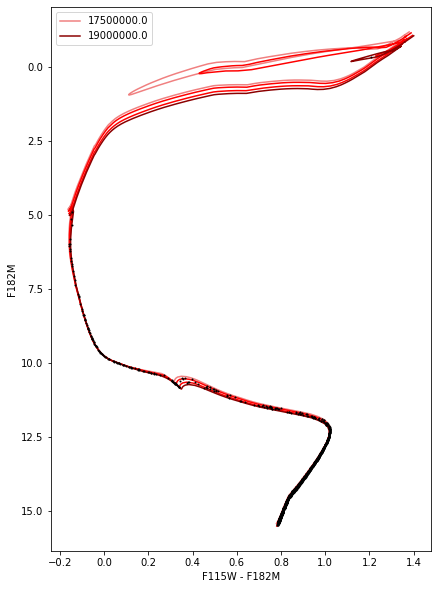

In [10]:
fig, axes = py.subplots(figsize=(15, 10))

# plot CMD
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

for i in range(len(stars)):
    if stars[i] is None:
        continue
    py.plot(stars[i][3] - stars[i][4], stars[i][4], marker='o', markersize=1, color='k')
